## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer' )

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data_df['Mouse ID'].unique())

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_mask = combined_data_df['Mouse ID'].duplicated()
duplicate_mice = combined_data_df[duplicate_mice_mask]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
not_clean = combined_data_df

####
combined_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID'])
combined_data_df.head()

print(len(combined_data_df), len(not_clean))

249 1893


In [6]:
# Checking the number of mice in the clean DataFrame.
len(combined_data_df['Mouse ID'].unique())

249

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# drug_grouping = combined_data_df.groupby('Drug Regimen')
drug_grouping = not_clean.groupby('Drug Regimen')

vol_mean = drug_grouping.mean()['Tumor Volume (mm3)']
vol_std = drug_grouping.std()['Tumor Volume (mm3)']
vol_variance = drug_grouping.var()['Tumor Volume (mm3)']
vol_median = drug_grouping.median()['Tumor Volume (mm3)']
vol_sem = drug_grouping.sem()['Tumor Volume (mm3)']

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_summary_df = pd.merge(vol_mean, vol_median, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)_x': 'mean', 'Tumor Volume (mm3)_y': 'median'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_variance, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'variance'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_std, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'std'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_sem, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'sem'})

regimen_summary_df

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_df = drug_grouping.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

regimen_summary_df

# combined_data_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

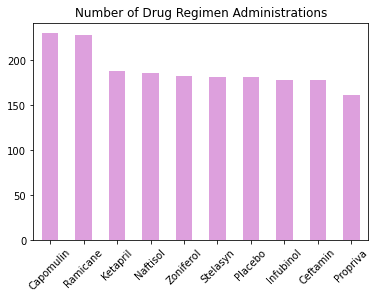

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_instances = not_clean['Drug Regimen'].value_counts()

num_instances.plot.bar(color='plum',rot=45, title='Number of Drug Regimen Administrations')
num_instances

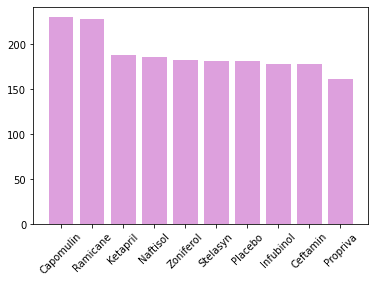

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
num_drugs = np.arange(len(num_instances))
plt.bar(num_drugs, num_instances, color='plum', align='center')
plt.xticks(num_drugs, num_instances.index, rotation=45)
plt.show()

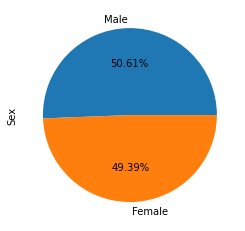

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distrib_sex = not_clean['Sex'].value_counts()
distrib_sex.plot(kind='pie', autopct='%1.2f%%')

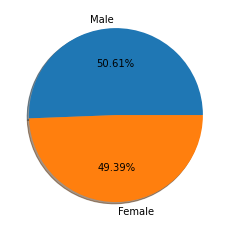

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distrib_sex, labels=distrib_sex.index, autopct='%1.2f%%', shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_instances = []
for mouse in not_clean['Mouse ID'].unique():
    mouse_data = not_clean[not_clean['Mouse ID'] == mouse]
    max_timepoint = mouse_data['Timepoint'].max()
    
    
    last_mouse_instance = mouse_data.loc[mouse_data['Timepoint'] == max_timepoint]
    last_mouse_instance = last_mouse_instance[['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
    
    last_instances.append(last_mouse_instance)

last_instances


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


[  Mouse ID  Tumor Volume (mm3)  Timepoint
 9     k403           22.050126         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 19     s185           23.343598         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 29     x401           28.484033         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 39     m601           28.430964         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 49     g791           29.128472         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 59     s508           30.276232         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 64     f966           30.485985         20,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 74     m546           30.564625         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 84     z578           30.638696         45,
    Mouse ID  Tumor Volume (mm3)  Timepoint
 94     j913            31.56047         45,
     Mouse ID  Tumor Volume (mm3)  Timepoint
 104     u364           31.023923         45,
     Mouse ID  Tumor 

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
